# Stumps, trees and forests

** Ecole Centrale Nantes **

** Diana Mateus **

PARTICIPANTS: **Orane VERNET, Diane CHOUNLAMOUNTRY**

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

#Modules for image processing
import skimage
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize

#Modules for machine learning
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

#Useful for manual data splitting
import random
from sklearn.utils import shuffle

D:\Appli\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## 1. Decision stumps
A decision stump is a machine learning model consisting of a one-level decision tree. That is, it is a decision tree with one internal node (the root) which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediction based on the value of just a single input feature. Sometimes they are also called 1-rules [Wikipedia]

***a)*** Run the provided code to generate and plot a toy dataset consisting of 2D points and 4 classes



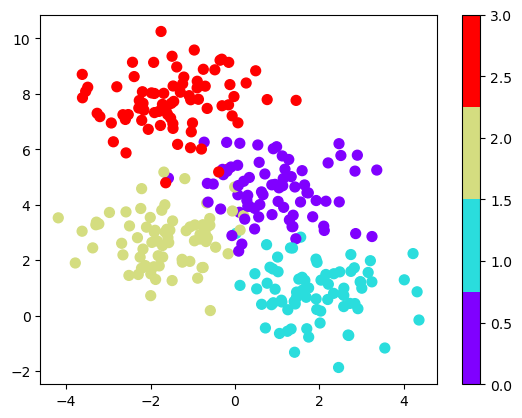

In [2]:
#a) Load and plot dataset, split in train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

n_classes = 4
X, y = make_blobs(n_samples=300, centers=n_classes,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.get_cmap('rainbow', 4));
plt.colorbar();

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)




**b)** Observe the functions **stump** and **split**.

**stump** is a function that generates the parameters of a random axis-aligned split  according to the number of features of a given dataset. The function receives the data matrix Xtrain and returns
    - the index of one randomly chosen feature (one dimension)
    - as well as a randomly chosen threshold within the min and max values of the chosen feature.

**split**  receives as input:
    - A dataset of points
    - the parameters generated by the stump function above.
The function then partitions the *dataset* in two subsets according to the threshold of the chosen dimension.
The output are two arrays, each containing the _indices_ of the points belonging to one or the other subset.

**c)** Run the split function **several times**, and display the resulting subsets as 2D scatter plots with circles of different colors for each class. Use the provided plotting functions.

Stump parameters 0 -3.0540807663864404
Sizes: original set: 225  left subset: (11,)  right subset: (214,)


C:\Temp\overnet2022\ipykernel_14156\2237686565.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))


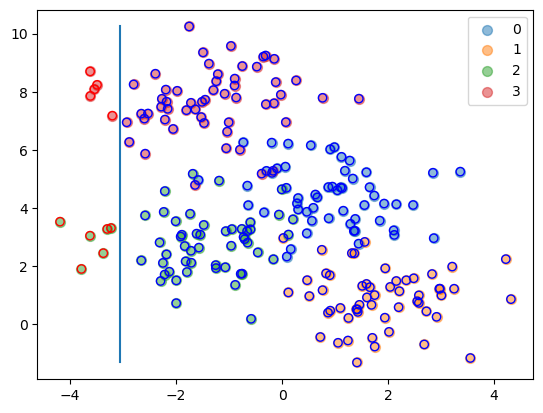

In [3]:
from random import randint, uniform

# b) Stumps and Split

def stump(X):
    f = randint(0, X.shape[1]-1) #randomly select a feature/dimension randint()
    t = uniform(np.min(X[:,f]),np.max(X[:,f])) #sample from an uniform() between the min and max values of the feature
    return f,t


def split(X, f, t):
    ind_l, = np.where(X[:,f]<=t)
    ind_r, = np.where(X[:,f]>t)
    return ind_l, ind_r

# c) Plotting a stump

def plot_stump (Xtrain,ytrain,feat,th,ind_l,ind_r):
    n_classes=np.max(ytrain)+1;
    #print(n_classes)
    for c in range(n_classes):
        X0_c=Xtrain[np.where(ytrain==c), 0] #first coordinate of points belonging to class c
        X1_c=Xtrain[np.where(ytrain==c), 1] #second coordinate of points belonging to class c
        plt.scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))

    #plt.axis('equal')

    #draw the points on the left and right child as circles around the original training dataset
    plt.scatter(Xtrain[ind_l, 0], Xtrain[ind_l, 1], c='none', edgecolor='r')
    plt.scatter(Xtrain[ind_r, 0], Xtrain[ind_r, 1], c='none', edgecolor='b')

    #draw threshold line
    if feat == 0:
        plt.plot([th,th],[np.min(Xtrain[:,1]),np.max(Xtrain[:,1])])
    elif feat == 1:
        plt.plot([np.min(Xtrain[:,0]),np.max(Xtrain[:,0])],[th,th])
    leg = plt.legend();


feat, th = stump(Xtrain)
print('Stump parameters', feat, th)
ind_l,ind_r = split(Xtrain, feat, th)
print('Sizes: original set:', len(ytrain),
      ' left subset:' ,  ind_l.shape,
      ' right subset:', ind_r.shape)


plot_stump(Xtrain,ytrain,feat,th,ind_l,ind_r)



**d)** Implement a function ***class_distributions*** that given a set of points reaching a node returns the posterior class distribution of the node (approximated as the normalized histogram with #points per class).

``` python
def class_distributions(ytrain,num_classes):
```

Compute the class distributions of:
    - of the original training set (before the split),
    - of each of the 2 subsets resulting from after the split has been applied.

Plot the histograms of the children nodes

**e)** Create a function to compute the ***information_gain*** of a split. The function should receive the full training dataset (Xtrain and ytrain) and the indices of two subsets resulting from the current split.

``` python
def information_gain(ytrain,ind_left, ind_right,num_classes):
```
```Hint: ```  when computing the Entropy, ignore the classes with zero probabilities, and carry on summation using the same equation.



Original set histogram


Text(0.5, 1.0, 'Noeud droit')

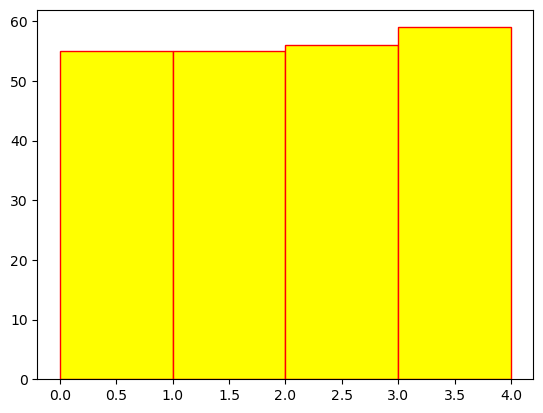

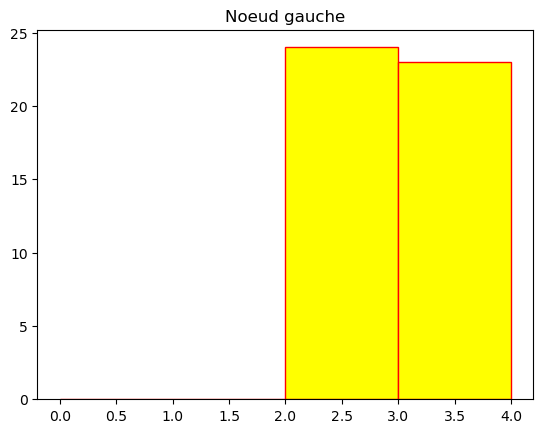

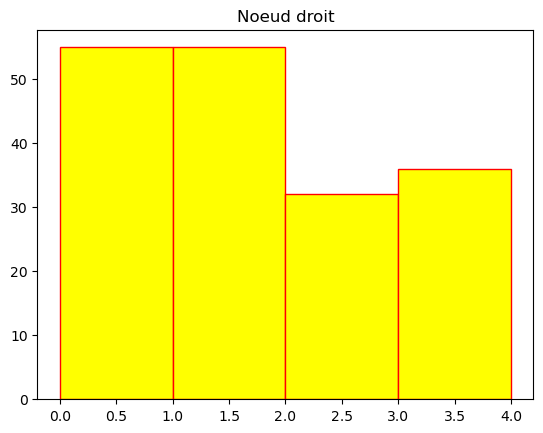

In [4]:
def class_distributions(ytrain,num_classes):
    L=[0]*num_classes
    long=len(ytrain)
    for k in range(long):
        ind=ytrain[k]
        L[ind]+=1
    M=max(L);
    return L

num_classes=4
print('Original set histogram')
L_train=class_distributions(ytrain,num_classes)
plt.figure()
plt.hist(ytrain, range = (0,num_classes), bins =num_classes,color = 'yellow', edgecolor = 'red')

f,t=stump(Xtrain)
ind_l, ind_r=split(Xtrain, f, t)
long_l=np.shape(ind_l)
long_r=np.shape(ind_r)
ytrain_l=[0]*ind_l
ytrain_r=[0]*ind_r
for k in range(long_l[0]):
    ytrain_l[k]=ytrain[ind_l[k]]
for k in range(long_r[0]):
    ytrain_r[k]=ytrain[ind_r[k]]
    

L_train_l=class_distributions(ytrain_l,num_classes)
plt.figure()
plt.hist(ytrain_l, range = (0,num_classes), bins =num_classes,color = 'yellow', edgecolor = 'red')
plt.title('Noeud gauche')

L_train_r=class_distributions(ytrain_r,num_classes)
plt.figure()
plt.hist(ytrain_r, range = (0,num_classes), bins =num_classes,color = 'yellow', edgecolor = 'red')
plt.title('Noeud droit')

In [77]:
def entropie(ytrain,num_classes):
    L=class_distributions(ytrain,num_classes)
    long=len(ytrain)
    L=[x/long for x in L]
    H=0
    for k in range(num_classes):
        if L[k]!=0:
            H=H-L[k]*math.log2(L[k])
    return(H)


def information_gain(ytrain,ytrain_l, ytrain_r,num_classes):
    Hq=entropie(ytrain,num_classes)
    Hl=entropie(ytrain_r,num_classes)
    Hr=entropie(ytrain_l,num_classes)
    Nq=len(ytrain)
    Nr=len(ytrain_r)
    Nl=len(ytrain_l)
    return(Hq-Nr*Hr/Nq-Nl*Hl/Nq)
print(information_gain(ytrain,ytrain_l, ytrain_r,num_classes))

0.6668003678050197


**f)** Create a function ***train*** to perfom a *randomized node optimization*. The function receives as parameters the full training dataset (Xtrain and ytrain) as well as the number of random stumps to try. The function will
- generate the desired number of stumps,
- split the dataset according to each stump,
- evaluate the ***information gain*** for each split
- choose and then return the parameters of the best stump.

``` python
def train_stumps(Xtrain, ytrain, trials):
```

Print the progress of the information gain during the training process

**g)** Make predictions with the trained model and display the restuls

Les paramètres du meilleur stump sont 1  et  5.828097383594384


C:\Temp\overnet2022\ipykernel_13260\2237686565.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))


Text(0.5, 1.0, 'Prédiction avec le modèle entraîné')

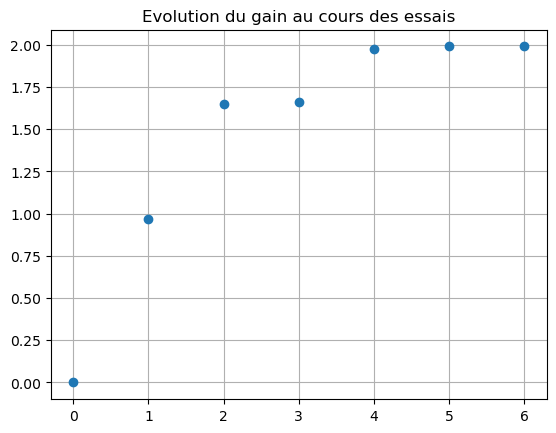

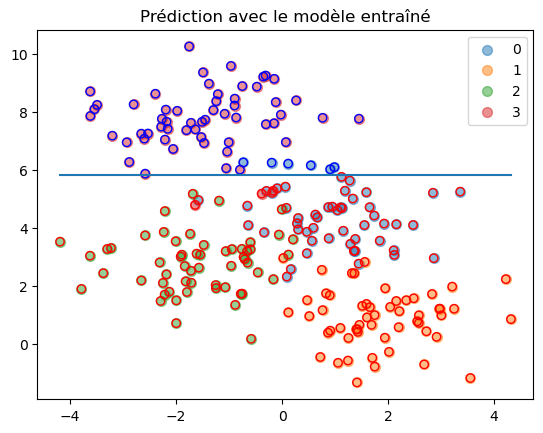

In [101]:
def train_stumps(Xtrain, ytrain, trials):
    num_classes=4
    gain=[0]
    feat=[0]*trials
    th=[0]*trials
    for k in range(trials):
        f,t=stump(Xtrain)
        ind_l,ind_r=split(Xtrain,f,t)
        
        long_l=np.shape(ind_l)
        long_r=np.shape(ind_r)
        ytrain_l=[0]*ind_l
        ytrain_r=[0]*ind_r
        for i in range(long_l[0]):
            ytrain_l[i]=ytrain[ind_l[i]]
        for i in range(long_r[0]):
            ytrain_r[i]=ytrain[ind_r[i]]
            
        inf=information_gain(ytrain,ytrain_l, ytrain_r,num_classes)
        if inf > gain[-1]:
            gain.append(inf)
        feat[k]=f
        th[k]=t
        
        
    opt=max(gain)
    index=gain.index(opt)
        
    f_opt = feat[index]
    t_opt = th[index]
        
        
        
        
    return f_opt,t_opt,gain
    

trials = 10000
f_opt,t_opt,gain =train_stumps(Xtrain, ytrain, trials)
print("Les paramètres du meilleur stump sont", f_opt,' et ',t_opt)
#print("Le gain a évolué de la manière suivante : ", gain)
plt.figure()
plt.plot(gain,'o')
plt.grid()


plt.title('Evolution du gain au cours des essais')

plt.figure()    
ind_l,ind_r=split(Xtrain,f_opt,t_opt)
plot_stump(Xtrain,ytrain,f_opt,t_opt,ind_l,ind_r)
plt.title('Prédiction avec le modèle entraîné')
    

## 3. Comparing classifiers on the Caltech 101 dataset

Compare the performances of an SVM, a Decision Tree and Random Forest classifiers on the 10 classes subset of the **Caltech 101** dataset.
Focus here on the **multi-class** classification task (e.g. 5 classes).
Reuse the `loadImagesAndLabels()` and `buildDataset()` functions from the SVM lab course.


**a)** Load and split the dataset

**b)** Train three classification models on the train dataset
- a Logistic Regression
- an SVM
- a single decision tree ``sklearn.tree.DecisionTree``
- a Random Forest ``sklearn.ensemble.RandomForestClassifier``

Question: Which among these are natively multi-class classifiers?

Print the accuracy on the train and test sets for each model. ``from sklearn import metrics``

**c)** Can we use ROC curves directly in this case? How ?

**d)** Do a gridsearch with a 5-fold crossvalidation varying the hyperparameters of each model (e.g., for the SVM the ``kernel``, the ``gamma`` and ``c``, and for the tree-based models  ``max_depth``, ``max_features``, ``min_samples_leaf``, and ``n_estimators``).

``from sklearn.model_selection import GridSearchCV``

**Hint**
```
tuned_parameters = [{'max_depth': [1, 5, 10],
                     'max_features': [1, 15, 30, 45, 60],
                     'n_estimators': [1, 25, 50, 75, 100],
                     'min_samples_leaf': [3,5,10]}]
                     
```
- What are the best parameters found to maximize the area under the curve in each case?

**e)** Discuss the results and curves.

In [2]:
#question a) Load and split the dataset

#IMDIR = '//data-pfe/overnet2022/EI2/APSTA/TP3/caltech-101/'
IMDIR = '//data-pfe/overnet2022/EI2/APSTA/TP3/animals10classes/'


def loadImagesAndLabels(IMDIR):
  #This function glances through all subdirectories in IMDIR,
  #and creates a list of the subdirectory names, which will be
  #used as labels for all the images within.The function returns
  #the list of labels
  #
  #If the function returns an empty list, it is likely that IMDIR
  #is not defined correctly. In that case uncomment the lines below
  #to check the files that are actually being read.

  labelNamesAll = []

  for root, dirnames, filenames in os.walk(IMDIR):
      labelNamesAll.append(dirnames)
      #uncomment to check if the folder contains images
      #for filename in filenames:
      #   f = os.path.join(root, filename)
      #   if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
      #       print(f)

  labelNamesAll = labelNamesAll[0]
  return labelNamesAll

#Call the function and
#print the list of all labels/subdirectories
labelNamesAll = loadImagesAndLabels(IMDIR)
print(labelNamesAll)


['ant', 'butterfly', 'crayfish', 'crocodile', 'dragonfly', 'flamingo', 'lobster', 'octopus', 'sea_horse', 'starfish']


In [3]:
def buildDataset (IMDIR,labelNamesAll,K=5,N=100,imHeight=100,imWidth=100,seed=100):
    #This function builds the data matrix from (a subset) of the label list.
    #Images are read using a composition of the path and the label list.
    #Parameters of this functions are:
    # K : the number of classes to consider
    # N : the maximum number of images to read from each category (the number
    #    of images per label is variable).
    # imHeight,imWidth: define the size of the target image. All read images
    #                  are resized to imHeight x imWidth
    # seed : fixes the random seed to be able to reproduce the results.
    # The function returns the data matrix X and the label vector Y.
    # Ideally, the X matrix will be of size (KxN)x(ImHeight x ImWidth) but
    # the number of rows will be less if there number of images in a given
    # category is smaller than N

    X = np.zeros([K*N,imHeight*imWidth]) #data matrix, one image per row
    Y = -np.ones([K*N,1]) #label indices initiallized to -1
    labelNames = [] #list of retained categories

    random.seed(a=seed) #comment to make each run random

    globalCount = 0 #counts the actual number of images copied to the datamatrix

    # Iterate over the number of classes
    for i in range(K):
        #Randomly choose a new category
        while True:
            lab = random.randint(0,len(labelNamesAll)-1)
            while labelNamesAll[lab] in labelNames :
                lab = random.randint(0,len(labelNamesAll)-1)
            if lab not in labelNames:
                break

        #define the path to read the images of the chosen label.
        #folders are named after the class label, print the chosen label
        filedir = os.path.join(IMDIR,labelNamesAll[lab])
        print('The chosen label ',i, ' is ',labelNamesAll[lab])
        print('It will be read in',filedir)

        #save the name of the class in labelNames
        labelNames.append(labelNamesAll[lab])

        #walk through the files of the label folder,
        #read images in grayscale and resize them
        #flatten the images to a vector
        #copy each image to one row of the data matrix
        #use classCount to retain at most N images per class
        #use globalCount to keep track of the total number of images
        classCount = 0
        for filename in os.listdir(filedir):
            f = os.path.join(filedir, filename)
            if f.endswith(('.jpg')) and (classCount < N):
                image = skimage.io.imread(f, as_gray=True)
                image = skimage.transform.resize(image, [imHeight,imWidth],mode='constant')#,anti_aliasing=True)
                X[globalCount,:] = image.flatten()
                Y[globalCount,:] = i
                globalCount += 1
                classCount += 1

    #Remove the unused entries of X and Y
    print("Total number of samples",globalCount)
    X = X[:globalCount,:]
    Y = Y[:globalCount,:]

    return X,Y,labelNames

#Call the buildDataset function

X,Y,labelNames = buildDataset (IMDIR,labelNamesAll,K=5,N=100,imHeight=100,imWidth=100,seed=100)

#Check the built dataset classes
print("Used labels",labelNames)
print("Size of data matrix", X.shape)
print("Class labels", Y.T)

The chosen label  0  is  crayfish
It will be read in //data-pfe/overnet2022/EI2/APSTA/TP3/animals10classes/crayfish
The chosen label  1  is  octopus
It will be read in //data-pfe/overnet2022/EI2/APSTA/TP3/animals10classes/octopus
The chosen label  2  is  lobster
It will be read in //data-pfe/overnet2022/EI2/APSTA/TP3/animals10classes/lobster
The chosen label  3  is  flamingo
It will be read in //data-pfe/overnet2022/EI2/APSTA/TP3/animals10classes/flamingo
The chosen label  4  is  sea_horse
It will be read in //data-pfe/overnet2022/EI2/APSTA/TP3/animals10classes/sea_horse
Total number of samples 270
Used labels ['crayfish', 'octopus', 'lobster', 'flamingo', 'sea_horse']
Size of data matrix (270, 10000)
Class labels [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [4]:
M,_ = np.shape(X)

m = round(M*0.8)

lignes_training_set = random.sample(range(0,M), min(m,M))
lignes_training_set.sort()
lignes_testing_set = np.setdiff1d(np.arange(M),lignes_training_set) #liste complémentaire
#print(lignes_training_set)
#print(lignes_testing_set)

X_train = X[lignes_training_set,:]
X_test =  X[lignes_testing_set,:]
Y_train = Y[lignes_training_set,0]
Y_test = Y[lignes_testing_set,0]

print("size of train dataset",X_train.shape)
print("size of test dataset",X_test.shape)
print("train target vector",Y_train.T)
print("test target vector",Y_test.T)

size of train dataset (216, 10000)
size of test dataset (54, 10000)
train target vector [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
test target vector [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4.]


In [8]:
#Train three classification models on the train dataset

    # svm model

svmLin=SVC(kernel='linear')
svmLin.fit(X_train, Y_train)
Y_pred_svm=svmLin.predict(X_test)
Y_pred_svm_train = svmLin.predict(X_train)

print('Vecteurs valeurs vraies :',Y_test)
print('Vecteurs de prédictions :',Y_pred_svm)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_svm))
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_svm_train))

Vecteurs valeurs vraies : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4.]
Vecteurs de prédictions : [0. 0. 0. 1. 2. 3. 0. 4. 3. 0. 0. 0. 1. 4. 2. 1. 3. 0. 0. 2. 4. 0. 0. 2.
 3. 3. 0. 0. 0. 4. 0. 3. 3. 3. 0. 3. 3. 3. 3. 0. 4. 3. 0. 0. 2. 0. 3. 3.
 3. 0. 1. 0. 2. 2.]
Test Accuracy: 0.3148148148148148
Train Accuracy: 1.0


In [9]:
    #single decision tree
model_sdt = sklearn.tree.DecisionTreeClassifier()
model_sdt.fit(X_train, Y_train)

Y_pred_sdt = model_sdt.predict(X_test)
Y_pred_sdt_train = model_sdt.predict(X_train)

print('Vecteurs valeurs vraies :',Y_test)
print('Vecteurs de prédictions :',Y_pred_sdt)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_sdt))
print("Test Accuracy:", accuracy_score(Y_train, Y_pred_sdt_train))

Vecteurs valeurs vraies : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4.]
Vecteurs de prédictions : [0. 4. 0. 0. 4. 2. 2. 4. 3. 0. 0. 0. 0. 3. 0. 1. 3. 4. 4. 2. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 3. 3. 4. 1. 0. 3. 1. 4. 4. 4. 3. 1. 2. 2. 2. 2. 4. 2.
 4. 0. 3. 4. 4. 0.]
Test Accuracy: 0.35185185185185186
Test Accuracy: 1.0


In [7]:
    # Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, Y_train)

Y_pred_rf = model_rf.predict(X_test)
Y_pred_rf_train = model_rf.predict(X_train)

print('Vecteur valeurs vraies :',Y_test)
print('Vecteur de prédictions :',Y_pred_rf)
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Accuracy:", accuracy_score(Y_train, Y_pred_rf_train))

Vecteur valeurs vraies : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4.]
Vecteur de prédictions : [0. 0. 0. 0. 0. 4. 0. 4. 3. 0. 0. 0. 0. 3. 0. 1. 1. 4. 0. 2. 2. 0. 0. 2.
 0. 3. 0. 0. 0. 0. 4. 3. 3. 4. 0. 3. 3. 0. 0. 3. 4. 1. 0. 3. 3. 0. 4. 0.
 4. 3. 3. 0. 4. 0.]
Accuracy: 0.4444444444444444
Accuracy: 1.0


In [10]:
#d) Do a gridsearch with a 5-fold crossvalidation varying the hyperparameters of each model

from sklearn.model_selection import GridSearchCV


svm_params = {'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
decision_tree_params = {'max_depth': [1, 5, 10], 'max_features': [1, 15, 30, 45, 60], 'min_samples_leaf': [3, 5, 10]}
random_forest_params = {'max_depth': [1, 5, 10], 'max_features': [1, 15, 30, 45, 60], 'min_samples_leaf': [3, 5, 10], 'n_estimators': [1, 25, 50, 75, 100]}


svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=5, scoring='accuracy')
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=decision_tree_params, cv=5, scoring='accuracy')
random_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid=random_forest_params, cv=5, scoring='accuracy')


svm_grid.fit(X_train, Y_train)
decision_tree_grid.fit(X_train, Y_train)
random_forest_grid.fit(X_train, Y_train)

# Print the best hyperparameters for each model
print("Meilleurs paramètres pour SVM:", svm_grid.best_params_)
print("Meilleurs paramètres pour Decision Tree:", decision_tree_grid.best_params_)
print("Meilleurs paramètres pour Random Forest:", random_forest_grid.best_params_)

Meilleurs paramètres pour SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Meilleurs paramètres pour Decision Tree: {'max_depth': 5, 'max_features': 45, 'min_samples_leaf': 5}
Meilleurs paramètres pour Random Forest: {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 3, 'n_estimators': 75}
